# Plot Project Car Data in Real Time

In [39]:
import serial
import json
from types import SimpleNamespace 

import numpy as np
import matplotlib.pyplot as plt

import time

PORT = "/dev/cu.usbmodemM43210051"
BAUD = 9600

### Read Data

Use the pySerial library to read data from USB serial and save it as an array.
The data is in the form of a JSON object with the sensor outputs

In [40]:
def getData():
   
    with serial.Serial(
        PORT,
        BAUD,
        timeout=1,
    ) as s:
        while(True):
            try:
                dataRead = s.readline().decode("ASCII")
                if dataRead[0] != '{':
                    continue
                break
            except(UnicodeDecodeError):
                continue
        print(dataRead)
        data = json.loads(dataRead)
        sensorData = np.array(data["sensor"])
        print(sensorData)
        return sensorData


### Plot Data

Use matplotlib matshow to plot the array as a heatmap

{"sensor":[509,486,555,578,509,625,601,1714]}

[ 509  486  555  578  509  625  601 1714]


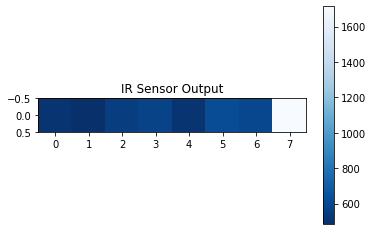

In [41]:
from IPython import display

while(True):
    display.clear_output(wait=True)
    plt.figure()
    plt.title("IR Sensor Output")
    data = np.expand_dims(getData(), axis=0)
    color_map = plt.imshow(data)
    color_map.set_cmap("Blues_r")
    plt.colorbar()
    plt.show()
